## Collapsing measures

In [1]:
import pandas as pd
import ptitprince as pt
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.stats import pearsonr

%matplotlib inline
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

In [2]:
# Here function that creates summary tables
%run functions_online_demographics.ipynb

In [3]:
# Setting current directory
os.chdir("../../")

In [4]:
# Checks current directory
cwd = os.getcwd() 
print("Current working directory is:", cwd) 

Current working directory is: C:\Users\katya\MPI4


##### Loading the data  

In [5]:
#Loading the data for session 1

session1 = pd.read_csv('data/session1/clean_dataset.csv')
session1 = session1.set_index('PROLIFICID')

#Loading the data for session 8

session8 = pd.read_csv('data/session8/clean_dataset.csv')
session8 = session8.set_index('PROLIFICID')

#Loading the data for session 15

session15 = pd.read_csv('data/session15/clean_dataset.csv')
session15 = session15.set_index('PROLIFICID')

### Session1  

In [6]:
session = session1

In [7]:
session1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402 entries, 55d06fd334e9060012e5781c to 5eab262cef271f0e2a7e0075
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   submitdate                  400 non-null    object 
 1   lastpage                    402 non-null    int64  
 2   SESSIONID                   402 non-null    float64
 3   GROUP                       402 non-null    object 
 4   sr_age                      400 non-null    float64
 5   sr_gender                   396 non-null    object 
 6   sr_postcode                 402 non-null    object 
 7   q6_me_inf                   397 non-null    float64
 8   q6_close_person_inf         397 non-null    float64
 9   q6_close_person_died        397 non-null    float64
 10  q6_econ_impact_me           402 non-null    float64
 11  q6_econ_impact_closep       402 non-null    float64
 12  q6_work_home                402 non-null    float64
 

##### Overall Distribution

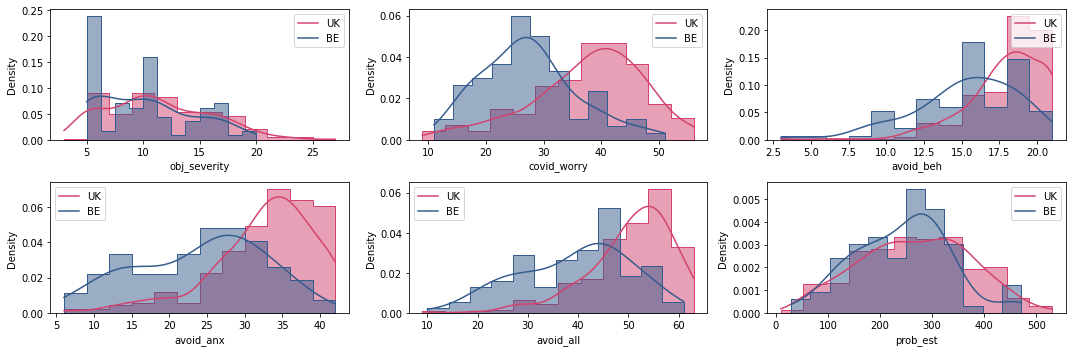

In [8]:
ivs = ["obj_severity", "covid_worry", "avoid_beh", "avoid_anx", "avoid_all", "prob_est"]

plt.subplots(figsize=(15,5))

for i in enumerate(ivs): 
    plt.subplot(2,3, i[0]+1)
    sns.histplot(session[i[1]][session['GROUP'] == 'UK'], bins = 12,stat='density', kde=True, element="step", color = sns.color_palette("magma")[3])
    sns.histplot(session[i[1]][session['GROUP'] == 'BE'], bins = 12,stat='density', kde=True, element="step", color = sns.color_palette("viridis")[1])
    plt.legend(['UK', 'BE'])

    plt.tight_layout()

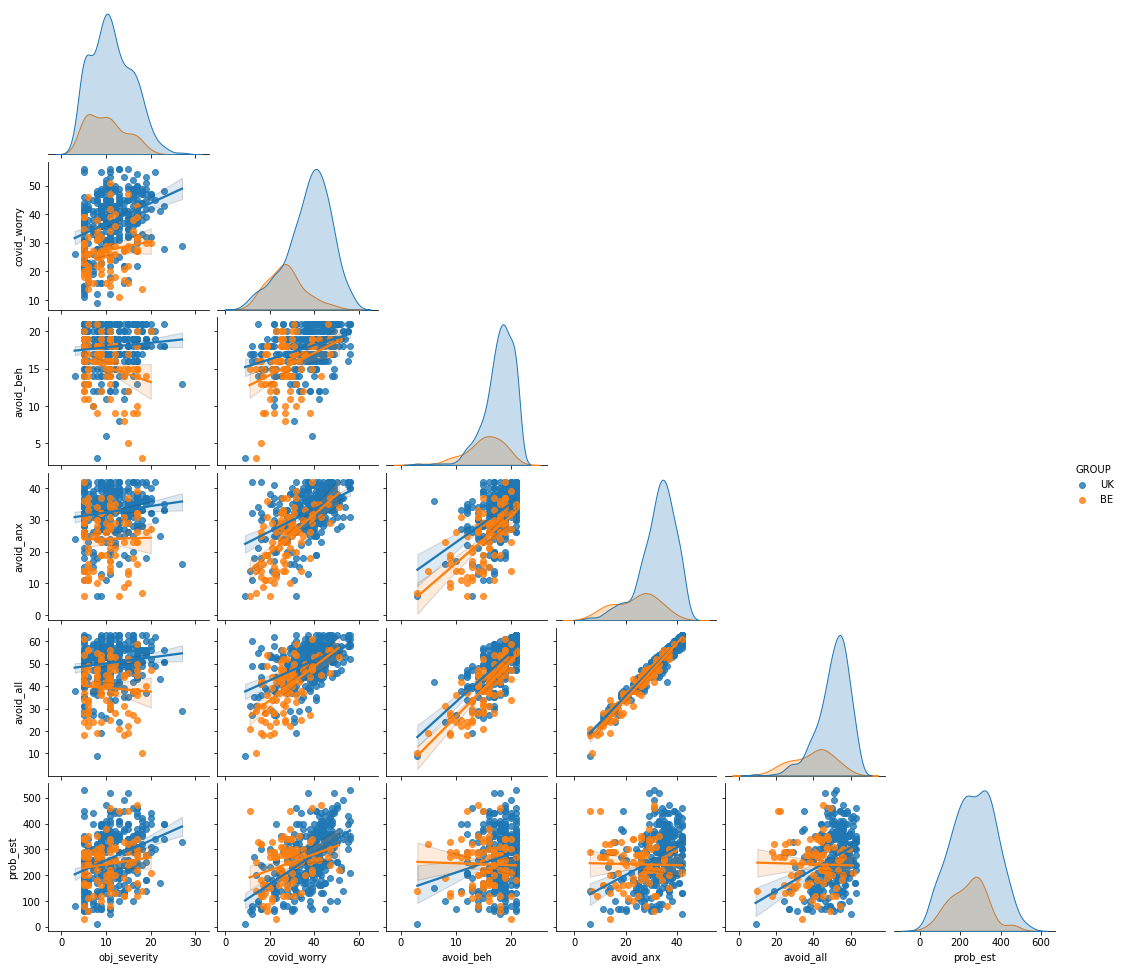

In [9]:
sdf = session1.loc[:,["obj_severity", "covid_worry", "avoid_beh", "avoid_anx", "avoid_all", "prob_est", 'GROUP']]
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg", hue = 'GROUP')
plt.subplots_adjust(top=0.9)

In [10]:
df = session.loc[:,["obj_severity", "covid_worry", "avoid_beh", "avoid_anx", "avoid_all", "prob_est"]]

In [11]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

obj_severity covid_worry avoid_beh avoid_anx avoid_all  prob_est
obj_severity       1.0***     0.32***     0.054   0.14***   0.127**  0.303***
covid_worry       0.32***      1.0***  0.437***  0.599***  0.606***  0.485***
avoid_beh           0.054    0.437***    1.0***  0.593***  0.771***  0.158***
avoid_anx         0.14***    0.599***  0.593***    1.0***   0.97***  0.276***
avoid_all         0.127**    0.606***  0.771***   0.97***    1.0***  0.266***
prob_est         0.303***    0.485***  0.158***  0.276***  0.266***    1.0***

<AxesSubplot:>

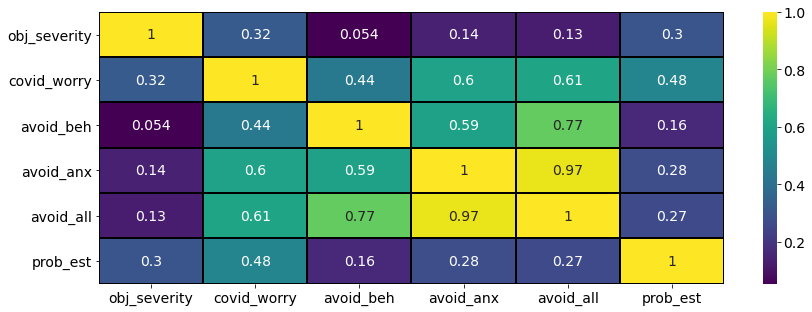

In [12]:
mpl.rcParams['figure.figsize'] = 14,5
mpl.rcParams['font.size'] = 14
sns.heatmap(rho, cmap = 'viridis', linecolor = 'black', linewidth = 1, annot = True)

##### Summary Table

In [13]:
dec = 3 #after decimal point for p-value

In [14]:
summary_table_collapsed(session, 2, dec, 'session1_online_demographics_collapsed')

Berlin                            \
                                           Male                    Female   
                                              M         %      SD       M   
Gender Ratio                                     36.36 %                    
Age                                       26.90              3.96   26.50   
Objective Severity                        10.06              4.51   10.23   
COVID-related worries                     23.53              7.05   29.11   
Avoidance behaviour                       15.41              3.31   15.00   
Avoidance anxiety                         22.31              9.50   24.71   
Avoidance all                             37.72             11.92   39.71   
Probability estimate of negative events  229.06            105.26  247.86   

                                                                    UK  \
                                                                  Male   
                                               %     SD      P       M   
Gender Ratio                             63.64 %                         
Age                                                4.96  0.698   28.42   
Objective Severity                                 4.06  0.857   10.72   
COVID-related worries                              8.10  0.002   35.83   
Avoidance behaviour                                3.68  0.607   17.61   
Avoidance anxiety                                  8.03  0.210   30.57   
Avoidance all                                     10.66  0.421   48.18   
Probability estimate of negative events           81.97  0.354  252.56   

                                                                           \
                                                          Female            
                                               %      SD       M        %   
Gender Ratio                             39.29 %                  60.71 %   
Age                                                 6.38   27.54            
Objective Severity                                  4.76   11.66            
COVID-related worries                              10.27   38.97            
Avoidance behaviour                                 2.79   18.17            
Avoidance anxiety                                   7.70   33.82            
Avoidance all                                       9.42   51.99            
Probability estimate of negative events           111.06  276.47            

                                                               
                                                            P  
                                             SD      P         
Gender Ratio                                                   
Age                                        6.01  0.223  0.087  
Objective Severity                         4.42  0.078  0.031  
COVID-related worries                      9.17  0.005  0.000  
Avoidance behaviour                        2.64  0.077  0.000  
Avoidance anxiety                          6.08  0.000  0.000  
Avoidance all                              7.63  0.000  0.000  
Probability estimate of negative events  100.94  0.052  0.043

### Session8

In [15]:
session = session8

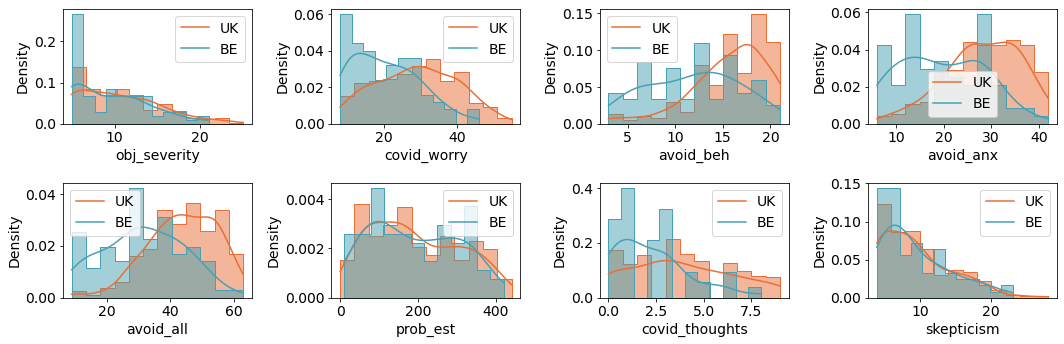

In [16]:
ivs = ["obj_severity", "covid_worry", "avoid_beh", "avoid_anx", "avoid_all", "prob_est", "covid_thoughts", "skepticism"]

plt.subplots(figsize=(15,5))

for i in enumerate(ivs): 
    plt.subplot(2,4, i[0]+1)
    sns.histplot(session[i[1]][session['GROUP'] == 'UK'], bins = 12,stat='density', kde=True, element="step", color=sns.color_palette("icefire")[5])
    sns.histplot(session[i[1]][session['GROUP'] == 'BE'], bins = 12,stat='density', kde=True, element="step", color=sns.color_palette("Spectral")[5])
    plt.legend(['UK', 'BE'])

    plt.tight_layout()

##### Cross correlations and distributions

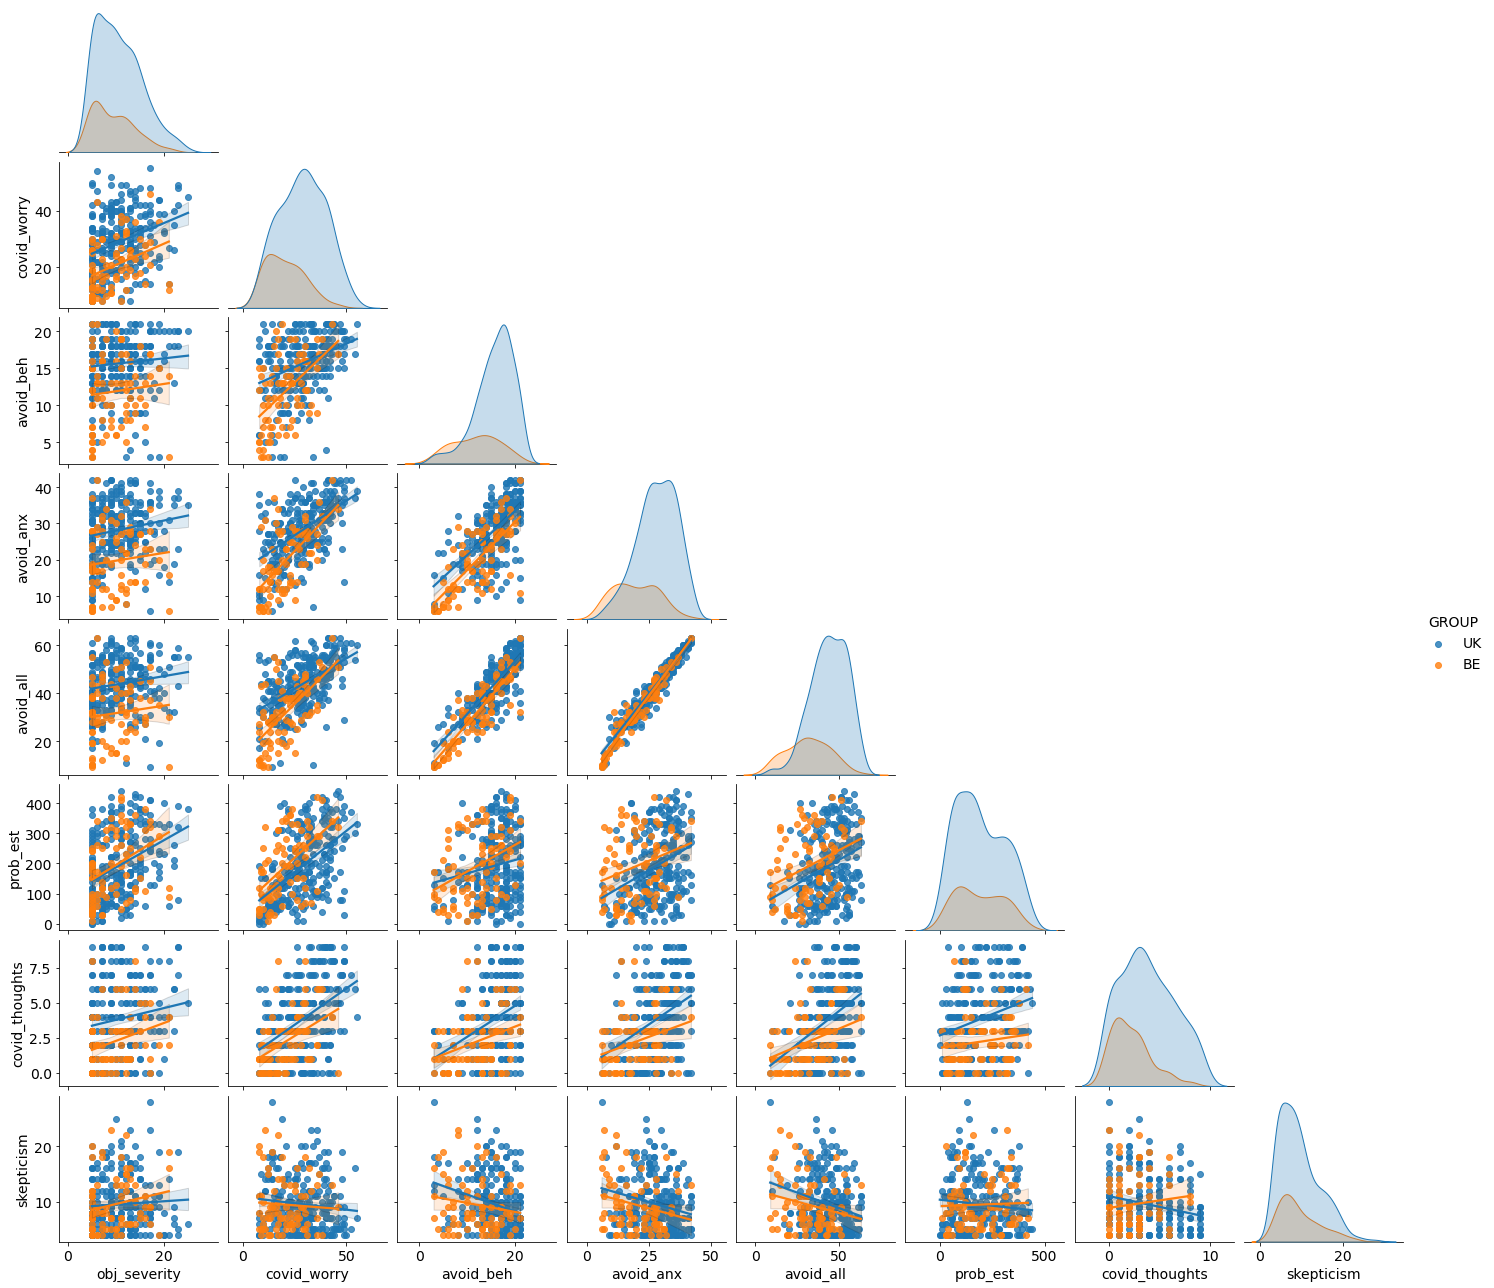

In [17]:
sdf = session.loc[:,["obj_severity", "covid_worry", "avoid_beh", "avoid_anx", "avoid_all", "prob_est", "covid_thoughts", "skepticism", 'GROUP']]
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg", hue = 'GROUP')
plt.subplots_adjust(top=0.9)

In [18]:
df = session.loc[:,["obj_severity", "covid_worry", "avoid_beh", "avoid_anx", "avoid_all", "prob_est", "covid_thoughts", "skepticism"]]

In [19]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

obj_severity covid_worry  avoid_beh  avoid_anx  avoid_all  \
obj_severity         1.0***    0.329***    0.118**   0.176***   0.168***   
covid_worry        0.329***      1.0***   0.459***   0.602***   0.597***   
avoid_beh           0.118**    0.459***     1.0***   0.693***   0.856***   
avoid_anx          0.176***    0.602***   0.693***     1.0***   0.966***   
avoid_all          0.168***    0.597***   0.856***   0.966***     1.0***   
prob_est           0.369***    0.502***   0.203***   0.295***   0.284***   
covid_thoughts     0.192***    0.481***   0.389***   0.413***   0.436***   
skepticism            0.086      -0.088  -0.211***  -0.197***  -0.217***   

                prob_est covid_thoughts skepticism  
obj_severity    0.369***       0.192***      0.086  
covid_worry     0.502***       0.481***     -0.088  
avoid_beh       0.203***       0.389***  -0.211***  
avoid_anx       0.295***       0.413***  -0.197***  
avoid_all       0.284***       0.436***  -0.217***  
prob_est          1.0***       0.231***     -0.071  
covid_thoughts  0.231***         1.0***  -0.145***  
skepticism        -0.071      -0.145***     1.0***

<AxesSubplot:>

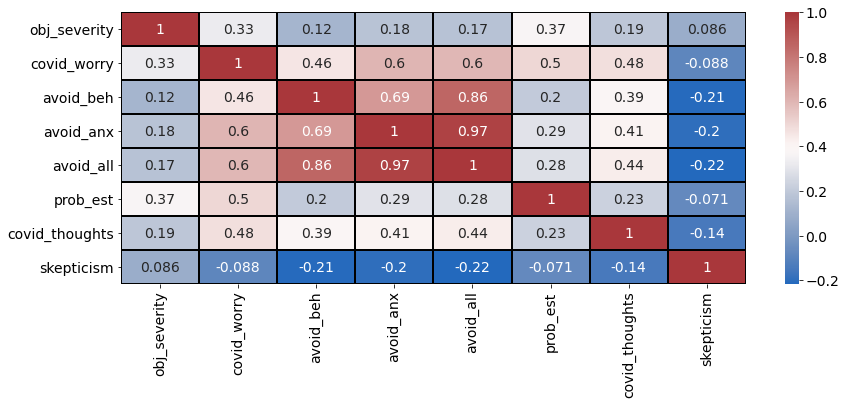

In [20]:
mpl.rcParams['figure.figsize'] = 14,5
mpl.rcParams['font.size'] = 14
sns.heatmap(rho, cmap = 'vlag', linecolor = 'black', linewidth = 1, annot = True)

##### Summary Table

In [21]:
summary_table_collapsed(session, 2, dec, 'session8_online_demographics_collapsed')

Berlin                           \
                                           Male                   Female   
                                              M         %     SD       M   
Gender Ratio                                     29.87 %                   
Age                                       27.35             3.86   27.15   
Objective Severity                         9.39             4.20    9.56   
COVID-related worries                     15.39             5.78   22.44   
Avoidance behaviour                       10.35             4.26   12.26   
Avoidance anxiety                         16.74             9.03   20.67   
Avoidance all                             27.09            12.43   32.93   
Probability estimate of negative events  186.09            98.15  188.70   
Covid Thoughts                             1.74             1.84    2.46   
Skepticism                                10.48             5.88    9.11   

                                                                     UK  \
                                                                   Male   
                                               %      SD      P       M   
Gender Ratio                             70.13 %                          
Age                                                 5.40  0.875   29.27   
Objective Severity                                  4.46  0.881   10.37   
COVID-related worries                               9.54  0.002   28.01   
Avoidance behaviour                                 4.90  0.108   15.55   
Avoidance anxiety                                   8.66  0.076   27.00   
Avoidance all                                      12.59  0.065   42.55   
Probability estimate of negative events           114.58  0.924  185.15   
Covid Thoughts                                      1.97  0.137    3.45   
Skepticism                                          4.32  0.259    9.49   

                                                                           \
                                                          Female            
                                               %      SD       M        %   
Gender Ratio                             40.08 %                  59.92 %   
Age                                                 6.05   28.47            
Objective Severity                                  4.82   10.75            
COVID-related worries                              10.80   29.33            
Avoidance behaviour                                 4.08   15.76            
Avoidance anxiety                                   8.00   28.95            
Avoidance all                                      10.92   44.71            
Probability estimate of negative events           114.72  195.61            
Covid Thoughts                                      2.61    3.99            
Skepticism                                          4.83    9.62            

                                                               
                                                            P  
                                             SD      P         
Gender Ratio                                                   
Age                                        6.06  0.306  0.070  
Objective Severity                         4.60  0.538  0.059  
COVID-related worries                     11.28  0.360  0.000  
Avoidance behaviour                        3.95  0.685  0.000  
Avoidance anxiety                          7.91  0.060  0.000  
Avoidance all                             10.82  0.126  0.000  
Probability estimate of negative events  115.37  0.485  0.864  
Covid Thoughts                             2.63  0.114  0.000  
Skepticism                                 4.91  0.842  0.925

### Session15

In [22]:
session = session15

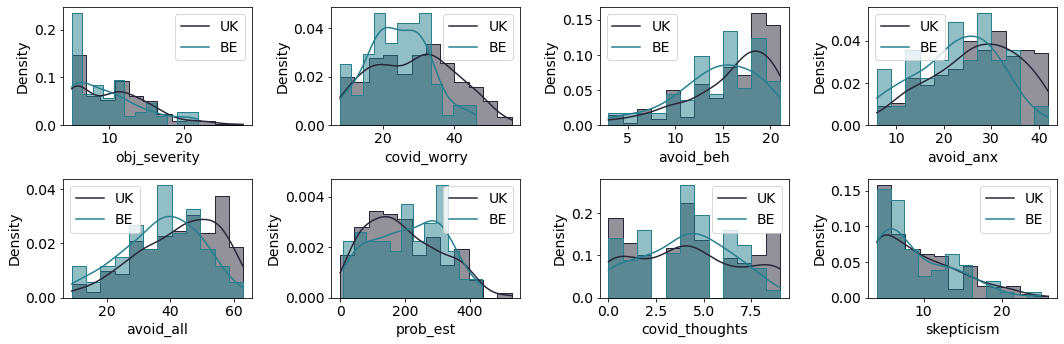

In [23]:
ivs = ["obj_severity", "covid_worry", "avoid_beh", "avoid_anx", "avoid_all", "prob_est", "covid_thoughts", "skepticism"]

plt.subplots(figsize=(15,5))

for i in enumerate(ivs): 
    plt.subplot(2,4, i[0]+1)
    sns.histplot(session[i[1]][session['GROUP'] == 'UK'], bins = 12,stat='density', kde=True, element="step", color=sns.color_palette("icefire")[2])
    sns.histplot(session[i[1]][session['GROUP'] == 'BE'], bins = 12,stat='density', kde=True, element="step", color=sns.color_palette("viridis")[2])
    plt.legend(['UK', 'BE'])

    plt.tight_layout()

##### Cross correlations and distributions

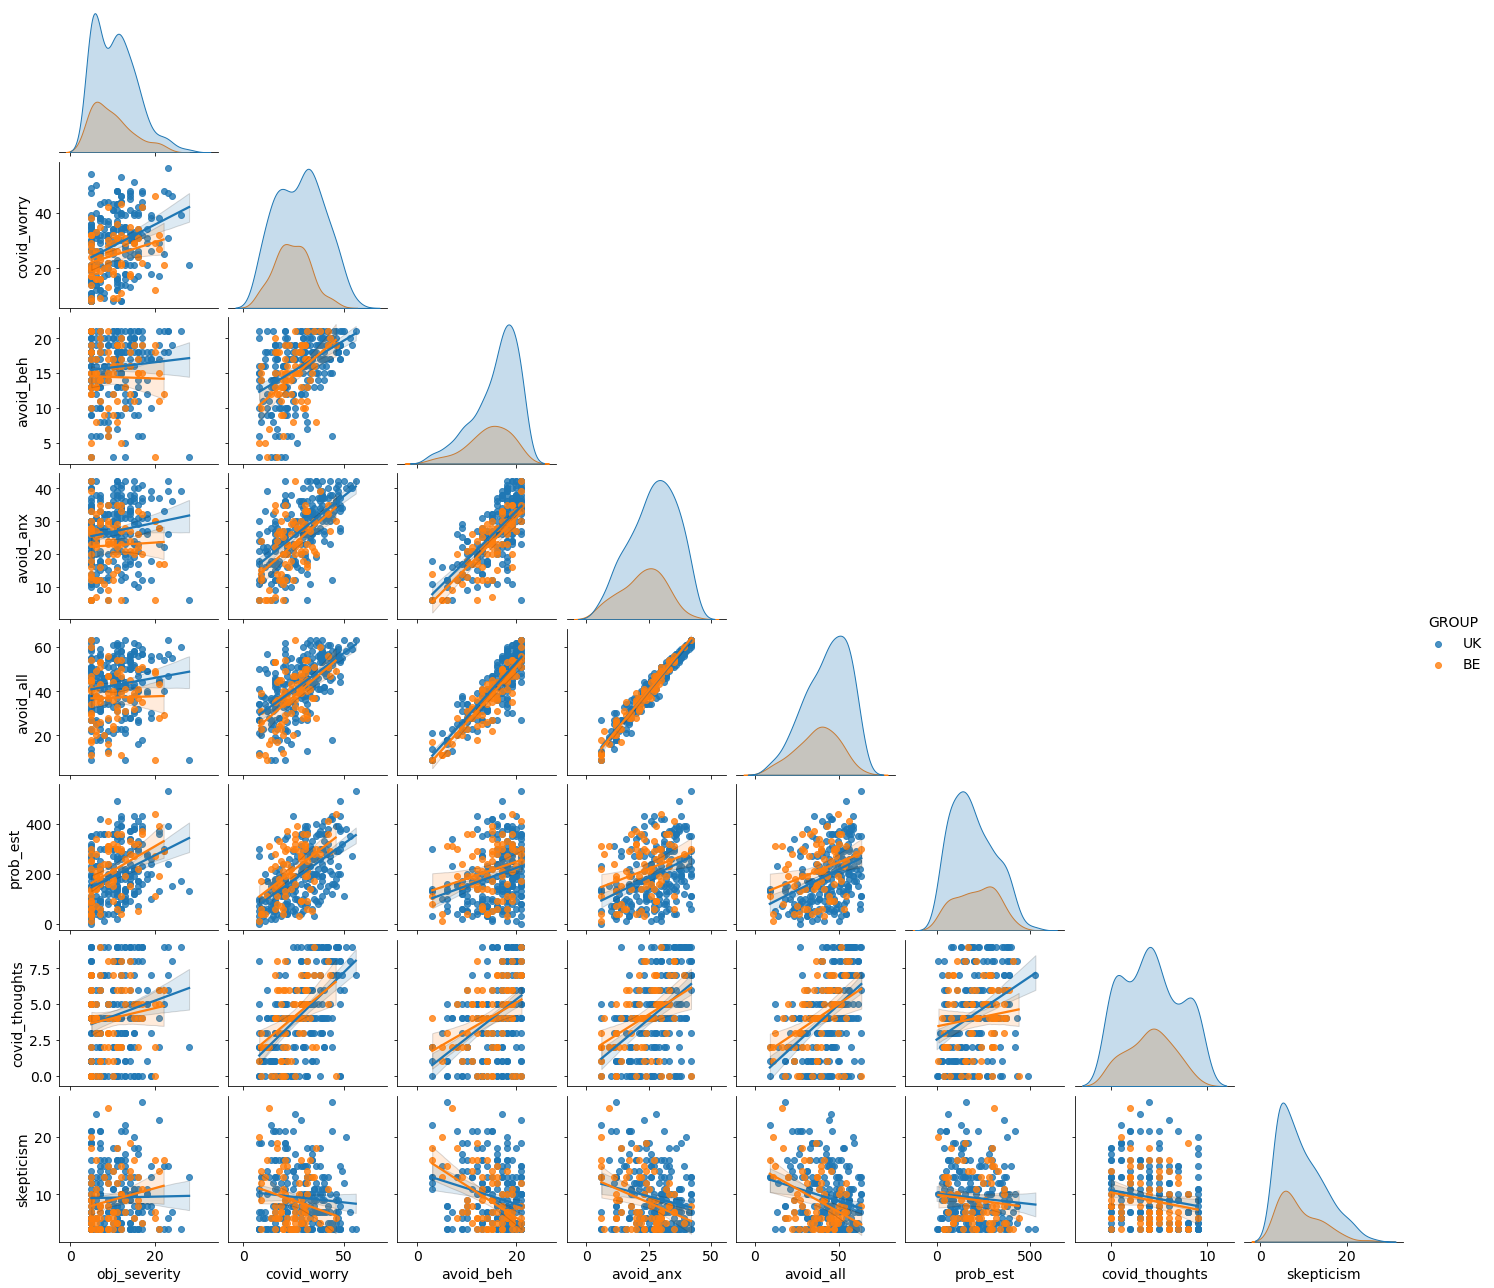

In [24]:
sdf = session.loc[:,["obj_severity", "covid_worry", "avoid_beh", "avoid_anx", "avoid_all", "prob_est", "covid_thoughts", "skepticism", 'GROUP']]
g = sns.pairplot(sdf, corner=True, diag_kind="kde", kind="reg", hue = 'GROUP')
plt.subplots_adjust(top=0.9)

In [25]:
df = session.loc[:,["obj_severity", "covid_worry", "avoid_beh", "avoid_anx", "avoid_all", "prob_est", "covid_thoughts", "skepticism"]]

In [26]:
rho = df.corr()
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(3).astype(str) + p

obj_severity covid_worry  avoid_beh  avoid_anx  avoid_all  \
obj_severity         1.0***    0.323***      0.065    0.133**    0.118**   
covid_worry        0.323***      1.0***   0.471***   0.613***   0.603***   
avoid_beh             0.065    0.471***     1.0***   0.734***   0.873***   
avoid_anx           0.133**    0.613***   0.734***     1.0***   0.972***   
avoid_all           0.118**    0.603***   0.873***   0.972***     1.0***   
prob_est           0.375***    0.552***   0.264***    0.35***   0.342***   
covid_thoughts     0.177***    0.529***   0.401***   0.442***   0.456***   
skepticism            0.061     -0.106*  -0.294***  -0.223***  -0.262***   

                prob_est covid_thoughts skepticism  
obj_severity    0.375***       0.177***      0.061  
covid_worry     0.552***       0.529***    -0.106*  
avoid_beh       0.264***       0.401***  -0.294***  
avoid_anx        0.35***       0.442***  -0.223***  
avoid_all       0.342***       0.456***  -0.262***  
prob_est          1.0***       0.295***     -0.088  
covid_thoughts  0.295***         1.0***  -0.172***  
skepticism        -0.088      -0.172***     1.0***

<AxesSubplot:>

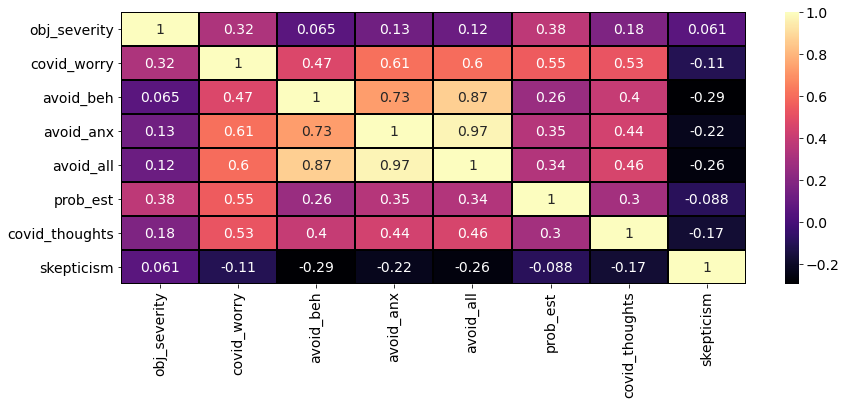

In [27]:
mpl.rcParams['figure.figsize'] = 14,5
mpl.rcParams['font.size'] = 14
sns.heatmap(rho, cmap = 'magma', linecolor = 'black', linewidth = 1, annot = True)

##### Summary Table

In [28]:
summary_table_collapsed(session, 2, dec, 'session15_online_demographics_collapsed')

Berlin                            \
                                           Male                    Female   
                                              M         %      SD       M   
Gender Ratio                                     32.88 %                    
Age                                       27.50              4.02   27.37   
Objective Severity                         9.46              5.24    9.90   
COVID-related worries                     20.17              6.42   25.73   
Avoidance behaviour                       12.88              4.48   14.96   
Avoidance anxiety                         20.50             10.05   23.24   
Avoidance all                             33.38             13.65   38.20   
Probability estimate of negative events  195.42            104.76  208.98   
Covid Thoughts                             3.50              2.45    4.24   
Skepticism                                 9.46              6.03    8.98   

                                                                     UK  \
                                                                   Male   
                                               %      SD      P       M   
Gender Ratio                             67.12 %                          
Age                                                 5.23  0.913   30.10   
Objective Severity                                  4.38  0.707   10.89   
COVID-related worries                               8.19  0.005   25.80   
Avoidance behaviour                                 4.17  0.054   15.35   
Avoidance anxiety                                   7.79  0.204   25.10   
Avoidance all                                      11.31  0.114   40.45   
Probability estimate of negative events           105.12  0.606  180.43   
Covid Thoughts                                      2.21  0.196    3.89   
Skepticism                                          4.07  0.690    9.89   

                                                                           \
                                                          Female            
                                               %      SD       M        %   
Gender Ratio                             43.12 %                  56.88 %   
Age                                                 5.96   29.42            
Objective Severity                                  5.15   10.31            
COVID-related worries                              11.67   29.78            
Avoidance behaviour                                 4.87   16.09            
Avoidance anxiety                                   9.57   28.10            
Avoidance all                                      13.41   44.19            
Probability estimate of negative events           109.15  199.19            
Covid Thoughts                                      2.97    4.40            
Skepticism                                          5.44    9.33            

                                                               
                                                            P  
                                             SD      P         
Gender Ratio                                                   
Age                                        5.90  0.405  0.005  
Objective Severity                         4.82  0.388  0.261  
COVID-related worries                     11.50  0.013  0.008  
Avoidance behaviour                        4.18  0.231  0.017  
Avoidance anxiety                          8.85  0.018  0.000  
Avoidance all                             12.32  0.034  0.001  
Probability estimate of negative events  114.90  0.224  0.269  
Covid Thoughts                             2.89  0.211  0.576  
Skepticism                                 4.89  0.423  0.516